In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as npy

In [3]:
df = pd.read_csv('events.csv',low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [5]:
import geopandas as gpd

In [7]:
brazil = gpd.read_file('mapas/gadm36_BRA_1.shp')

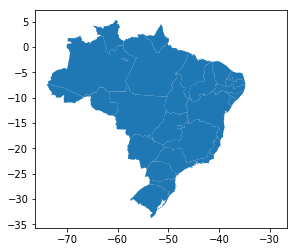

In [8]:
brazil.plot()
plt.show()

In [9]:
brazil.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,BRA,Brazil,BRA.1_1,Acre,None,None,Estado,State,None,BR.AC,"POLYGON ((-68.10552979000001 -10.72191715, -68..."
1,BRA,Brazil,BRA.2_1,Alagoas,None,None,Estado,State,None,BR.AL,"(POLYGON ((-35.88986206 -9.844305990000001, -3..."
2,BRA,Brazil,BRA.3_1,Amapá,None,None,Estado,State,None,BR.AP,"(POLYGON ((-50.82569504 2.522084, -50.82569504..."
3,BRA,Brazil,BRA.4_1,Amazonas,Amazone,None,Estado,State,None,BR.AM,"POLYGON ((-58.13698959 -7.35613918, -58.136821..."
4,BRA,Brazil,BRA.5_1,Bahia,Ba¡a,None,Estado,State,None,BR.BA,"(POLYGON ((-38.69208145 -17.95958328, -38.6920..."


In [10]:
v = df.loc[df.event=='visited site','region'].loc[df.country=='Brazil'].value_counts()

In [11]:
v.head()

Sao Paulo         24996
Unknown           12378
Minas Gerais       7755
Rio de Janeiro     6913
Bahia              5737
Name: region, dtype: int64

#### Ojo que hay un monton de unknown

In [12]:
#tengo que ver los indices que usa el csv y hacer que coincidan con los que usa el archivo del mapa
v.index

Index(['Sao Paulo', 'Unknown', 'Minas Gerais', 'Rio de Janeiro', 'Bahia',
       'Pernambuco', 'Ceara', 'Parana', 'Rio Grande do Sul',
       'Federal District', 'Goias', 'Santa Catarina', 'Para', 'Maranhao',
       'Espirito Santo', 'Rio Grande do Norte', 'Paraíba', 'Piaui', 'Alagoas',
       'Mato Grosso do Sul', 'Amazonas', 'Tocantins', 'Mato Grosso', 'Sergipe',
       'Rondonia', 'Amapa', 'Acre', 'Roraima'],
      dtype='object')

In [13]:
brazil = brazil.set_index('NAME_1')

In [14]:
brazil.index

Index(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba',
       'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype='object', name='NAME_1')

In [71]:
brazil.index = ['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Federal District', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Para', 'Paraíba',
       'Parana', 'Pernambuco', 'Piaui', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondonia', 'Roraima',
       'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins']

In [16]:
#uno los dos dataframe en uno (pero necesito que me quede un geodataframe asi que uso "brazil")
merged = brazil.join(v)

In [17]:
merged['region_log'] = npy.log(merged['region'])

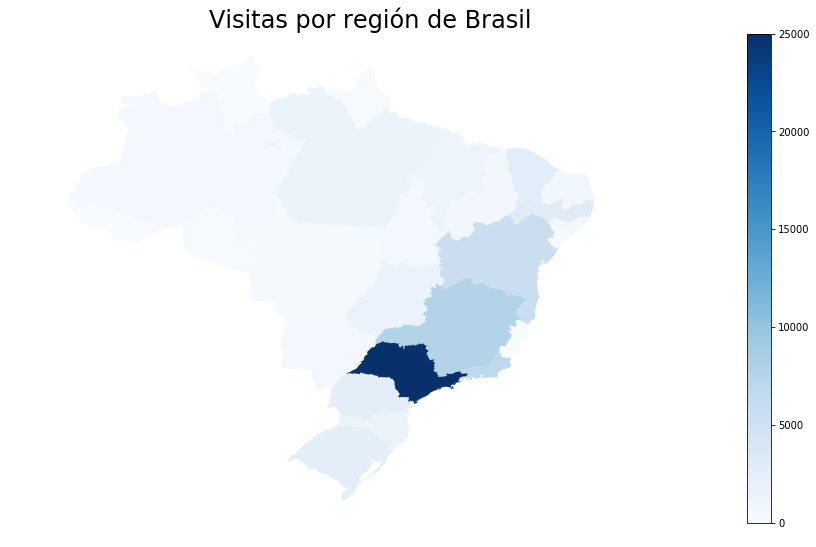

In [18]:
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
plt.title('Visitas por región de Brasil',size=24)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=25000))
sm._A = []
cbar = fig.colorbar(sm)
merged.fillna(0).plot(column='region',cmap='Blues',ax=ax)

In [44]:
visited_br = df.loc[df.event=='visited site'].loc[df.country=='Brazil']

In [52]:
devices = visited_br.groupby('region').apply(lambda x: pd.Series([x['device_type'].value_counts().idxmax(),\
                                                                  x['device_type'].count()]))

In [53]:
devices

,0,1
region,,
Acre,Computer,96
Alagoas,Computer,751
Amapa,Computer,148
Amazonas,Smartphone,600
Bahia,Smartphone,5737
Ceara,Computer,2829
Espirito Santo,Computer,1257
Federal District,Computer,1739
Goias,Computer,1564


In [55]:
devices.columns=['device','total']

In [56]:
devices.head()

,device,total
region,,
Acre,Computer,96
Alagoas,Computer,751
Amapa,Computer,148
Amazonas,Smartphone,600
Bahia,Smartphone,5737


In [72]:
map_dev = brazil.join(devices)

Text(0.5,1,'Dispositivo más utilizado según región')

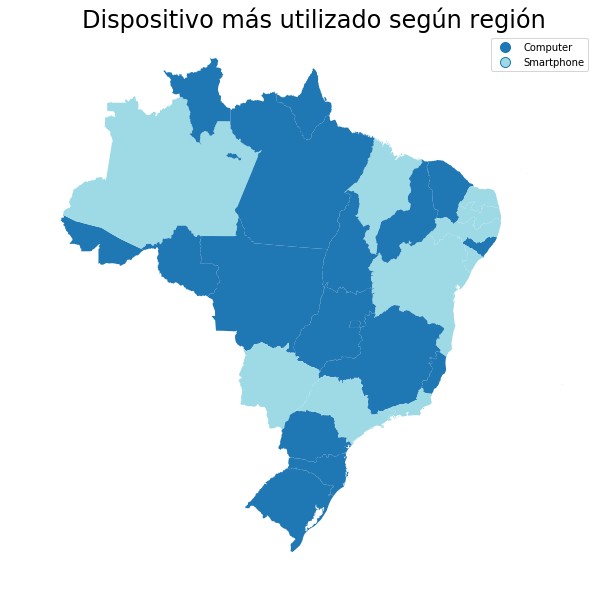

In [96]:
fig,ax = plt.subplots(figsize=(10,10))
ax.axis('off')
g = map_dev.fillna('no').plot(column='device',cmap='tab20',ax=ax,legend=True)
g.set_title('Dispositivo más utilizado según región',size=24)